In [1]:
import numpy as np
import os
import cv2
from tqdm import tqdm
import time

import matplotlib.pyplot as plt

# Check image

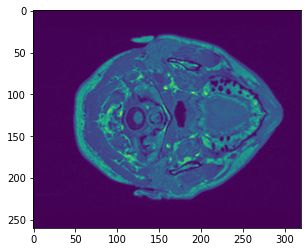

In [2]:
DATA_PATH = r"dataset\MRI_T1T2T2F_ROI"

image = cv2.imread(os.path.join(DATA_PATH,os.listdir(DATA_PATH)[1]),cv2.IMREAD_GRAYSCALE)

image = np.array(image)
plt.imshow(image)

In [3]:
import matplotlib.pyplot as plt

def pngToNumpy(dir_path : str, output_path : str, isDilation :bool = False):

    FILES = os.listdir(dir_path)
    images = []

    try:
        for img in tqdm(FILES, desc="png to inumpy", mininterval=0.02):
            img_path = os.path.join(dir_path,img)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            resizeImage = cv2.resize(image, dsize=(320, 260), interpolation=cv2.INTER_NEAREST)
            
            if isDilation : 
                kernel = np.ones((5,5), np.uint8)
                resizeImage = cv2.dilate(resizeImage, kernel, iterations=2)

            images.append(resizeImage)

    except Exception as e:
        print(e, img)

    # numpy array로 변환 후 저장

    plt.figure()

    plt.subplot(1,2,1)

    sampleImage = cv2.imread(os.path.join(dir_path,FILES[0]),cv2.IMREAD_GRAYSCALE)
    plt.imshow(np.array(sampleImage), cmap='gray')

    plt.subplot(1,2,2)
    plt.imshow(np.array(images[0]), cmap='gray')
    
    images = np.array(images)
    np.save(output_path, images)

## T1W image load

png to inumpy: 100%|██████████| 2356/2356 [00:13<00:00, 168.47it/s]


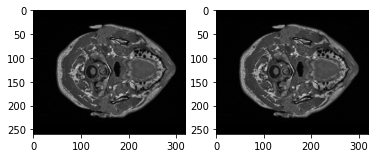

In [4]:
# T1W 이미지들 load
T1W_PATH = r'dataset\T1W_brain_pic'
OUTPUT_PATH = r'dataset\numpy\T1W_images.npy'

pngToNumpy(dir_path = T1W_PATH, output_path = OUTPUT_PATH)

## T2F image load

png to inumpy: 100%|██████████| 2356/2356 [00:12<00:00, 189.72it/s]


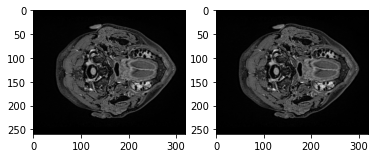

In [5]:
# T2F 이미지들 load
T2F_PATH = r'dataset\T2F_brain_pic'
OUTPUT_PATH = r"dataset\numpy\T2F_images.npy"

pngToNumpy(dir_path = T2F_PATH, output_path = OUTPUT_PATH)

## T2W image load

png to inumpy: 100%|██████████| 2356/2356 [00:09<00:00, 261.00it/s]


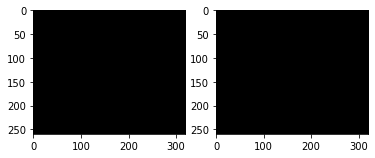

In [6]:
# T2W 이미지들 load
T2W_PATH = r'dataset\T2W_brain_pic'
OUTPUT_PATH = r"dataset\numpy\T2W_images.npy"

pngToNumpy(dir_path = T2W_PATH, output_path = OUTPUT_PATH)

## Mask image load

png to inumpy: 100%|██████████| 2356/2356 [00:01<00:00, 1529.72it/s]


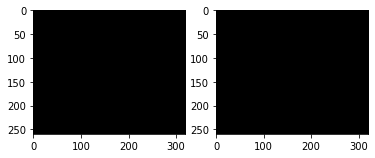

In [7]:
# mask 이미지들 load
MASK_PATH = r'dataset\Mask_brain_pic'
OUTPUT_PATH = r"dataset\numpy\Mask_images.npy"

pngToNumpy(dir_path = MASK_PATH, output_path = OUTPUT_PATH,isDilation=False)